In [41]:
import numpy as np
import autograd.numpy as np_ 
from autograd import grad
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Projeto: Predição de AVC's

Neste projeto, projetaremos e avaliaremos o classificador linear e o classificador por árvore de decisão no problema de predizer AVCs à partir da base de dados que está disponível no Kaggle. Também, avaliaremos quais foram os fatores de risco identificados por cada um dos classificadores e, após, verificaremos se esses fatores de risco identificados pelos classificadores já foram identificados anteriormente por algum estudo na área. Para isso, vamos usar classificadores para identificar *quais são os fatores de risco para o acidente vascular cerebral (AVC)*. Um AVC (*stroke*) é um dano cerebral causado pela interrupção de seu fluxo sanguíneo. Ter um AVC é um problema sério porque pode levar a sequelas, então é melhor preveni-lo do que tentar lidar com suas consequências.

## Descrição do Projeto

Temos à nossa disposição um conjunto de dados para [predição de AVCs](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset). O que faremos é:

1. Treinar um classificador para predizer se houve ou não houve AVCs
2. Verificar a acurácia do classificador
3. Identificar quais são os fatores que mais provavelmente estão ligados a ter AVCs

### Aproximação Linear

Usaremos a aproximação linear para prever outros resultados a partir das informações atuais, para isso criaremos uma linha que considere os pontos do DataFrame ou da matriz original. Realizamos um processo de *aprendizagem*, alterando a matriz de pesos ( $W^T$ ) e bias ( $b$ ), que modificam a matriz de características ( $X$ ) e nos fornecem uma matriz de valores de estimativa ( $Y^{est}$ ) . Criamos uma matriz de pesos $W^T$ e bias $b$ com valores que não são importantes, ou seja, podem ser aleatórios ou 1, pois serão corrigidos durante o processo. Em seguida, particionamos nossas matrizes originais (arrays de $X$ features e $Y$ results) em $X_{test}$ , $Y_{test}$ , $X_{train}$ e $Y_{train}$ . Treinamos nosso modelo usando arrays $train$ e testamos sua eficácia usando arrays $test$. Criamos nossa função de erro na qual estimamos a matriz $Y$ com o resultado $Y^{est}$ e retornamos o quadrado médio da diferença entre as duas matrizes (o erro). 

$$Y^{est} = W^TX + b$$

$$Erro = Média((Y-Y^{est})^2)$$

Esta função é passada para gradiente utilizando a biblioteca `autograd`, retornando o vetor gradiente da função de erro, este vetor com a derivada do erro em relação a cada parâmetro da função, sendo assim uma tupla com os novos valores de $W_{err}^T$ e $b_{err}$. Deste modo, multiplicamos $W_{err}^T$ e $b_{err}$ por $\alpha$ , que é nossa taxa de aprendizado. Pegamos esse o erro e o subtraímos dos valores originais de $W^T$ e $b$, tendo:

$$W^T = W^T - \alpha W_{err}^T$$

$$b = b - \alpha b_{err}$$

Temos assim, $W_{err}^T$ e $b_{err}$ que se assemelham à equação mais próxima da linha dos pontos originais, verificaremos a eficácia do modelo por comparação. Primeiro, calculamos $Y^{est}$ para $X^{test}$. Agora usamos a função de precisão para calcular a precisão do modelo.


### Hipótese Nula

A hipótese nula é a acurácia de um modelo que sempre categoriza algo como o resultado mais frequente. Nesse caso, temo a quantidade de vezes que o resultado mais frequente ocorreu ($r$) dividida pelo número total de resultados ($N$).

$$H_{0} = \frac{r}{N}$$

In [42]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

df_ = pd.get_dummies(df) #pd.get_dummies(df) é usado para converter variáveis categóricas em variáveis dummy.

#Cria-se dois filtros para separar as linhas em que existe acidente vascular cerebral e as linhas em que não existe.
filtro_naoexiste = df_['stroke'] == 0
filtro_existe = df_['stroke'] == 1

df_avc = df_[filtro_existe] #df_avc é um dataframe que contém apenas as linhas em que existe acidente vascular cerebral.
df_ausencia = df_[filtro_naoexiste] #df_ausencia é um dataframe que contém apenas as linhas em que não existe acidente vascular cerebral.
df_ausencia = df_ausencia.iloc[0:249] #df_ausencia é um dataframe que contém apenas as primeiras 249 linhas em que não existe acidente vascular cerebral.
df_ = pd.concat([df_ausencia, df_avc]) # concatena os dois dataframes em um único dataframe.

df_ = df_.drop('bmi', axis=1) # remove a coluna 'bmi' do dataframe.
df_ = df_.drop('id', axis = 1) # remove a coluna 'id' do dataframe.
df_ = df_.drop('avg_glucose_level', axis= 1) # remove a coluna 'avg_glucose_level' do dataframe.

In [43]:
y = df_['stroke'] # atribui a variável y a coluna 'stroke', que contém as variáveis de saída que o modelo deve prever.
X = df_.drop('stroke', axis = 1) # atribui a variável X todas as colunas do dataframe, exceto a coluna 'stroke', que contém as variáveis de entrada que o modelo deve usar para prever a variável de saída.

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5) # divide o conjunto de dados em dois conjuntos, um conjunto de treinamento e um conjunto de teste.
y_train.replace(0,-1,inplace=True) # substitui os valores 0 por -1.
y_test.replace(0,-1,inplace=True) # substitui os valores 0 por -1.


In [44]:
X_train # imprime o conjunto de treinamento.

,age,hypertension,heart_disease,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
32,82.0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0
310,43.0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0
63,45.0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
484,48.0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1
460,7.0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,80.0,1,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
239,60.0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
10,81.0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0
23,82.0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0


In [45]:
y_train # imprime o conjunto de treinamento.

32     1
310   -1
63     1
484   -1
460   -1
      ..
201    1
239    1
10     1
23     1
347   -1
Name: stroke, Length: 249, dtype: int64

In [46]:
def loss(parametros): # função de perda.
    p, b, pontos, val = parametros # p é o peso, b é o bias, pontos são os dados de treinamento e val são os dados de validação.
    est = p.T @ pontos + b # est é a estimativa.
    mse = np_.mean((est - val)**2) # mse é o erro quadrático médio.
    return mse

g = grad(loss) # grad() é uma função do autograd que calcula o gradiente da função de perda. 

pontos = X_train.to_numpy().T.astype('float64') # converte o conjunto de treinamento em um array numpy e transpõe o array.
alvos = y_train.to_numpy().astype('float64') # converte o conjunto de treinamento em um array numpy.

p = np.random.randn(19, 1) # Inicializa os pesos com valores aleatórios.

b = 0.0 # Inicializa o bias com o valor 0.0

alpha = 0.0001 # Inicializa o valor do passo com 0.0001.

erros = []
for n in range(50000): # Loop para atualizar os pesos e bias.
    grad_ = g((p, b, pontos, alvos)) # grad_ é o gradiente da função de perda.
    p -= alpha*grad_[0] # atualiza os pesos.
    b -= alpha*grad_[1] # atualiza o bias.
    erros.append(loss( (p, b, X_train.T, y_train) ))

print(p) # imprime os pesos.
print(b) # imprime o bias.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


[[ 0.02404237]
 [ 0.05184263]
 [-0.23146219]
 [-0.36354425]
 [-0.24725875]
 [-0.55771883]
 [-0.34464612]
 [-0.53011273]
 [ 0.48494485]
 [-1.33315205]
 [ 0.24238527]
 [ 0.07059891]
 [ 0.08054746]
 [ 0.19699751]
 [ 0.32523477]
 [-0.37688109]
 [-0.04367975]
 [-0.4359832 ]
 [-0.38131701]]
-0.6283680573789157


In [48]:
def accuracy(y_test, y_est): # função para calcular a acurácia.
    return np.mean(np.sign(y_test)==np.sign(y_est)) # retorna a acurácia.

pontos = X_test.to_numpy().T.astype('float64') # converte o conjunto de teste em um array numpy e transpõe o array.
alvos = y_test.to_numpy().astype('float64') # converte o conjunto de teste em um array numpy.
est = p.T @ pontos+ b # est é a estimativa.
print(f"Acurácia do nosso modelo treinado com regressão linear: {accuracy(est, alvos)*100:.4f}%") # imprime a acurácia do modelo treinado com regressão linear.
print(f"Acurácia do modelo de hipótese nula: {249/(249+249)*100:.2f}%") # imprime a acurácia do modelo de hipótese nula.

Acurácia do nosso modelo treinado com regressão linear: 77.9116%
Acurácia do modelo de hipótese nula: 50.00%


### Árvore de Decisão

A Entropia de Shannon é um valor $H(X)$ ligado a uma variável aleatória $X$. No caso discreto, a entropia é a soma de $- P(X=x_i) \log_2(P(X=x_i))$ para cada observação possível $x_i$.

$$H(X) = -\sum_i P(X=x_i) \log _2(P(X=x_i))$$

A entropia nos leva a decidir como a análise será feita, desde colunas, comparações e entre outras coisas.Quando realizamos questionamentos separaramos a classificação em ramos que representam o verdadeiro e falso.

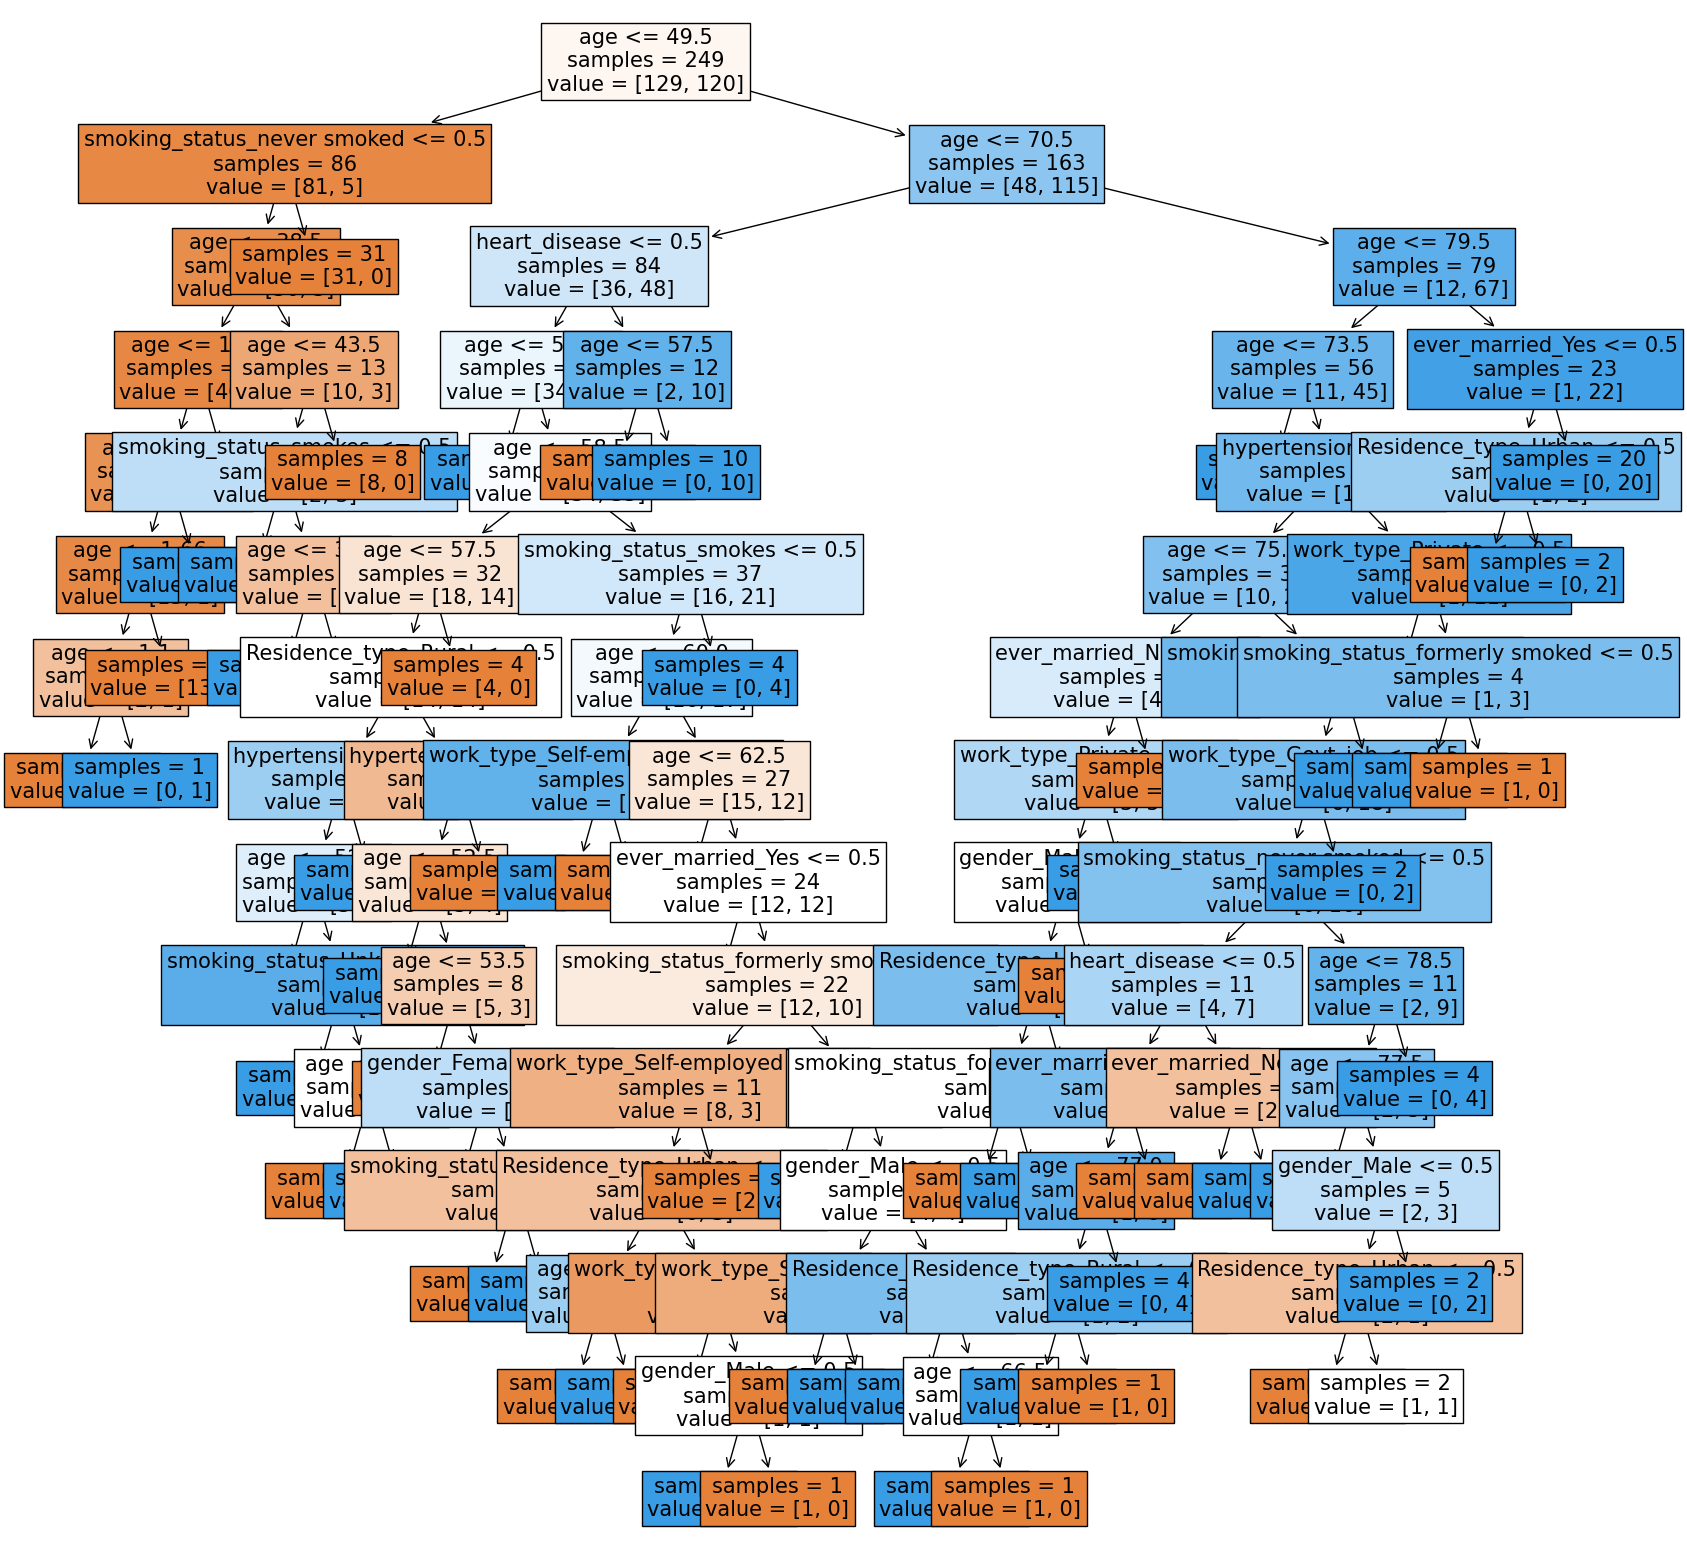

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

tree = DecisionTreeClassifier(criterion='entropy') # Cria o modelo de árvore de decisão.
tree.fit(X_test, y_test) # Treina o modelo de árvore de decisão.
plt.figure(figsize=(20,20)) # Define o tamanho da figura.
a = plot_tree(tree, feature_names=X_test.columns, fontsize=15, node_ids=False, impurity=False, filled=True) # Plota a árvore de decisão.